WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Loading historical data from cache...
Loading historical data from cache...
Loading historical data from cache...
r-hat: 0.006271723643604491, sigma-hat: 0.04986632879496327
Annualized return: 1.5804743581883318, Annualized volatility: 0.7916034287235121


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


Start Price: 28.3


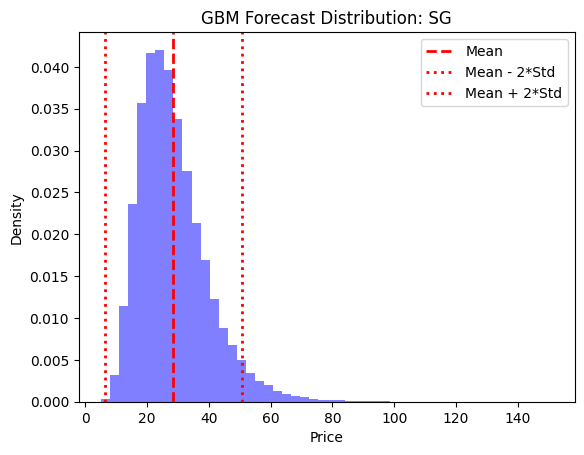

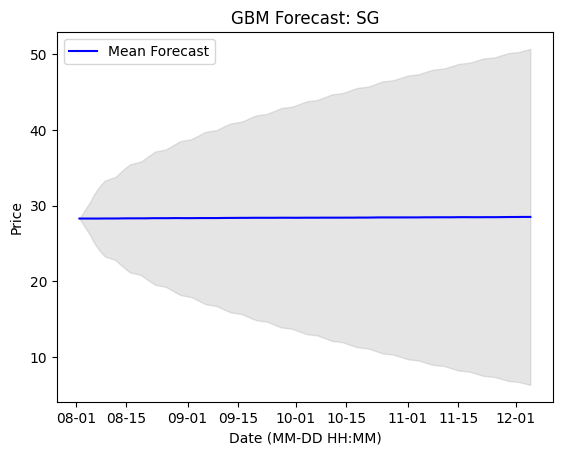


95% Confidence Interval:
Lower Bound: 6.32
Upper Bound: 50.71

Coverage Probability: 0.96
Number of Simulations Above Upper Bound: 4231
Number of Simulations Below Lower Bound: 9


<Figure size 640x480 with 0 Axes>

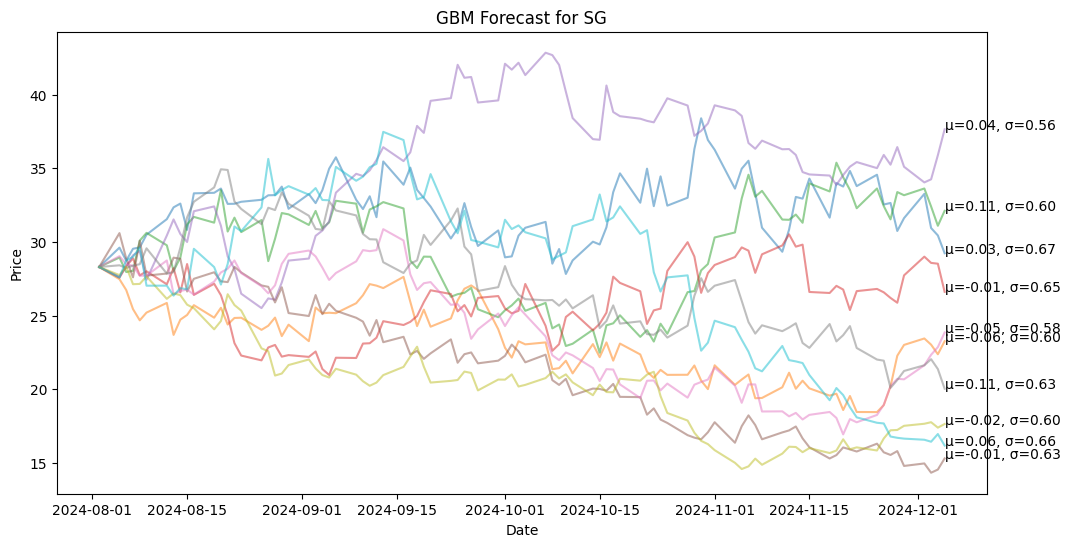

Simulation 1 MSE: 29.004235309723036
Simulation 2 MSE: 191.68927281772633
Simulation 3 MSE: 65.50909385005303
Simulation 4 MSE: 109.12680275577097
Simulation 5 MSE: 20.110999679542022
Simulation 6 MSE: 265.4994330757963
Simulation 7 MSE: 193.4553290273619
Simulation 8 MSE: 118.93673388516616
Simulation 9 MSE: 282.05372892434355
Simulation 10 MSE: 139.94144310647434
Simulation 11 MSE: 233.75892048502178
Simulation 12 MSE: 40.12032985248758
Simulation 13 MSE: 53.73413057913893
Simulation 14 MSE: 30.613997905036285
Simulation 15 MSE: 171.4783581700463
Simulation 16 MSE: 35.336204720442375
Simulation 17 MSE: 112.75775373177989
Simulation 18 MSE: 167.40922123199877
Simulation 19 MSE: 86.25975594083616
Simulation 20 MSE: 20.817464936072067
Simulation 21 MSE: 175.39532606409227
Simulation 22 MSE: 46.71752382332141
Simulation 23 MSE: 184.27714077553358
Simulation 24 MSE: 54.85012631372266
Simulation 25 MSE: 24.662917836369314
Simulation 26 MSE: 175.6821778054723
Simulation 27 MSE: 30.891737021

In [1]:
from backtester import Backtester
import matplotlib.pyplot as plt
# ignore warnings
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

stock = 'SG'
time_periods = 90
gbm_params = {
    'threshold': 2,
    'time_periods': time_periods,
    'num_simulations': 100000,
}
backtester = Backtester(stock, 'SMART', 'USD')
# data will be the most recent year of data, excluding the last 90 days. this is 
# because we will use the last 90 days as the test data
df = backtester.one_yr_1d_data
# is df a pandas dataframe?


# train data is the data excluding the last 90 days
train_data = df[df.index < df.index[-time_periods]]
test_data = df['close'][df.index >= df.index[-time_periods]]



simulations, associated_mu, associated_sigma, forecast_dates = backtester.forecast_data(gbm_params,train_data)
# we will use the last 90 days of data to test the model

mses = []
for i in range(gbm_params['num_simulations']):
    simulation = simulations[i]
    mse = sum((test_data - simulation) ** 2) / len(test_data)
    mses.append(mse)
    print(f'Simulation {i+1} MSE: {mse}')








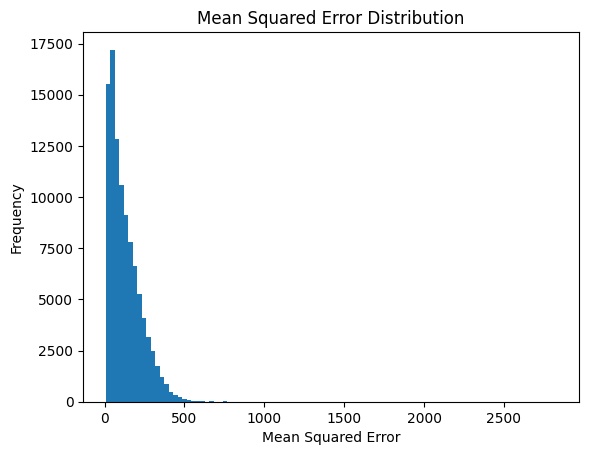

Simulation 1 MSE: 6.801804371354978
Associated mu: -0.030463592282122726
Associated sigma: 0.6076045592357872
Simulation 2 MSE: 7.082878045278448
Associated mu: 0.02648762027986924
Associated sigma: 0.6271715562553233
Simulation 3 MSE: 7.114485404868008
Associated mu: 0.0024425256959769385
Associated sigma: 0.6246020215389634
Simulation 4 MSE: 7.379337867189088
Associated mu: -0.06953967984171505
Associated sigma: 0.6168956872458057
Simulation 5 MSE: 7.425065783320459
Associated mu: 0.032535573315741875
Associated sigma: 0.5788870879317687
Simulation 6 MSE: 7.432071681579166
Associated mu: -0.009597320316790548
Associated sigma: 0.5814904322829336
Simulation 7 MSE: 7.764959508876511
Associated mu: 0.04126386995643907
Associated sigma: 0.6244960959081903
Simulation 8 MSE: 7.975243465126912
Associated mu: 0.039989791179068125
Associated sigma: 0.5775415975790839
Simulation 9 MSE: 8.10953226283782
Associated mu: 0.015049803377398635
Associated sigma: 0.6360751174230908
Simulation 10 MSE: 

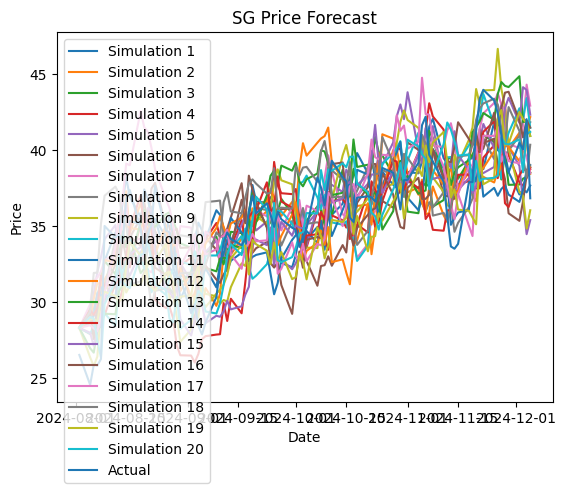

In [2]:
# study the distribution of the mean squared errors
# disgard inf
plt.hist(mses, bins=100)
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.title('Mean Squared Error Distribution')
plt.show()

# i want to do analysis on say how confident the model is in its predictions
# show some of the simulations that have the lowest mean squared error

# mses is a list of mean squared errors for each simulation
# plot the simulations with the 5 lowest mean squared error
for i in range(20):
    plt.plot(forecast_dates, simulations[mses.index(min(mses))], label=f'Simulation {i+1}')
    print(f'Simulation {i+1} MSE: {min(mses)}')
    # print the associated mu and sigma
    print(f'Associated mu: {associated_mu[mses.index(min(mses))]}')
    print(f'Associated sigma: {associated_sigma[mses.index(min(mses))]}') 
    mses[mses.index(min(mses))] = float('inf')

plt.plot(forecast_dates, test_data, label='Actual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock} Price Forecast')
plt.show()